In [1]:
import matplotlib.pyplot as plt
import numpy as np

[0.6, 0.82, 0.94, 0.94, 0.94, 0.94, 0.98, 0.98, 0.98, 0.98]
[0.62, 0.84, 0.94, 0.94, 0.94, 0.94, 0.98, 0.98, 0.98, 0.98]
[0.9111111111111111, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


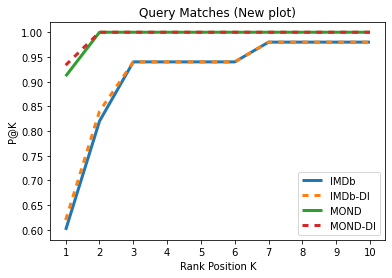

In [2]:
label_order = ['IMDb', 'IMDb-DI', 'MOND', 'MOND-DI']
dashes_order = [(1,0),(2,2),(1,0),(2,2)]
query_matches_results = {
    "IMDb-DI"   : {"mrr": 0.7690476190476194, "p@1": 0.62, "p@2": 0.84, "p@3": 0.94, "p@4": 0.94, "p@5": 0.94, "p@6": 0.94, "p@7": 0.98, "p@8": 0.98, "p@9": 0.98, "p@10": 0.98},
    "IMDb"      : {"mrr": 0.755714285714286, "p@1": 0.6, "p@2": 0.82, "p@3": 0.94, "p@4": 0.94, "p@5": 0.94, "p@6": 0.94, "p@7": 0.98, "p@8": 0.98, "p@9": 0.98, "p@10": 0.98},
    "MOND"   : {"mrr": 0.9555555555555556, "p@1": 0.9111111111111111, "p@2": 1.0, "p@3": 1.0, "p@4": 1.0, "p@5": 1.0, "p@6": 1.0, "p@7": 1.0, "p@8": 1.0, "p@9": 1.0, "p@10": 1.0},    
    "MOND-DI": {"mrr": 0.9666666666666667, "p@1": 0.9333333333333333, "p@2": 1.0, "p@3": 1.0, "p@4": 1.0, "p@5": 1.0, "p@6": 1.0, "p@7": 1.0, "p@8": 1.0, "p@9": 1.0, "p@10": 1.0}, 
}

for label,dashes in zip(label_order,dashes_order):
    precision_list = [query_matches_results[label][f'p@{i}'] for i in range(1,10+1)]
    print(precision_list)
    plt.plot([i for i in range(1,10+1)],precision_list, linewidth = 3,  label = label, dashes = dashes)

plt.title('Query Matches (New plot)')
plt.xticks(np.arange(1, 10+1, 1.0))
plt.xlabel('Rank Position K')
plt.ylabel('P@K')
plt.legend()
plt.savefig('qms-precision-at-k.pdf')  
plt.show()

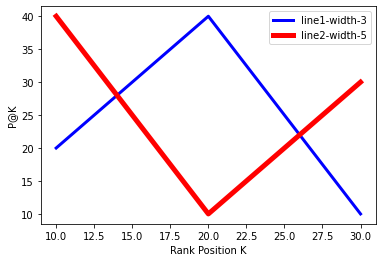

In [3]:
import matplotlib.pyplot as plt
# line 1 points
x1 = [10,20,30]
y1 = [20,40,10]
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]


plt.xlabel('Rank Position K')
plt.ylabel('P@K')
# Display the figure.
plt.plot(x1,y1, color='blue', linewidth = 3,  label = 'line1-width-3')
plt.plot(x2,y2, color='red', linewidth = 5,  label = 'line2-width-5')
# show a legend on the plot
plt.legend()
plt.show()

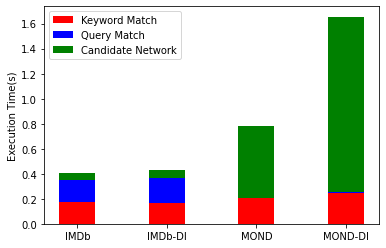

In [4]:
performance_results ={'keyword_matching_time': {'IMDb': 0.17123486743934335,
  'IMDb-DI': 0.16311269146011909,
  'MOND': 0.20620049766633505,
  'MOND-DI': 0.24691154144416538},
 'query_matching_time': {'IMDb': 0.17705535780027276,
  'IMDb-DI': 0.20345495622023008,
  'MOND': 0.003033677511686821,
  'MOND-DI': 0.008975450955525351},
 'candidate_networks_time': {'IMDb': 0.061031114980432906,
  'IMDb-DI': 0.06724109777947888,
  'MOND': 0.575027877888513,
  'MOND-DI': 1.3994221708895769}}




N = len(label_order)
ind = np.arange(N)

keyword_matching_time = [performance_results['keyword_matching_time'][label] for label in label_order]
query_matching_time = [performance_results['query_matching_time'][label] for label in label_order]
candidate_networks_time = [performance_results['candidate_networks_time'][label] for label in label_order]

width = 0.4

p1 = plt.bar(ind, keyword_matching_time, width, color='r')
p2 = plt.bar(ind, query_matching_time, width, color='b',
             bottom=keyword_matching_time )
p3 = plt.bar(ind, candidate_networks_time, width, color='g',
             bottom=np.array(keyword_matching_time)+np.array(query_matching_time))

plt.ylabel('Execution Time(s)')
plt.xticks(ind, label_order)
plt.legend((p1[0], p2[0],p3[0]), ('Keyword Match', 'Query Match','Candidate Network'))

plt.show()

In [5]:
label_order = ['IMDB', 'IMDB-DI', 'MONDIAL', 'MONDIAL-DI']

num_keyword_matches = {'IMDB': [9, 10, 12, 12, 11, 10, 11, 9, 9, 11, 10, 8, 4, 10, 10, 11, 3, 11, 10, 4, 14, 18, 19, 17, 17, 22, 17, 14, 24, 12, 32, 86, 60, 34, 25, 6, 8, 16, 15, 17, 14, 15, 22, 9, 10, 30, 18, 6, 13, 43],
                       'IMDB-DI': [9, 10, 12, 12, 11, 10, 11, 9, 9, 11, 10, 8, 4, 10, 10, 11, 3, 11, 10, 4, 14, 18, 19, 17, 17, 22, 17, 14, 24, 12, 32, 86, 46, 34, 25, 6, 8, 16, 15, 17, 14, 15, 22, 9, 10, 37, 23, 11, 20, 60],
                       'MONDIAL': [2, 1, 4, 9, 2, 1, 1, 1, 3, 3, 4, 3, 6, 1, 2, 9, 3, 3, 11, 4, 3, 4, 5, 5, 5, 3, 3, 5, 5, 2, 2, 6, 4, 3, 4, 7, 9, 10, 10, 5, 6, 4, 6, 6, 4, 5, 3, 4, 2, 2],
                       'MONDIAL-DI': [2, 1, 4, 9, 2, 1, 1, 1, 3, 3, 4, 3, 6, 1, 2, 9, 3, 3, 11, 4, 3, 3, 5, 5, 2, 2, 6, 4, 3, 4, 7, 11, 10, 10, 7, 8, 6, 8, 8, 6, 5, 3, 4, 2, 2]}

num_query_matches = {'IMDB': [14, 15, 20, 20, 19, 18, 19, 14, 17, 19, 18, 10, 4, 18, 18, 19, 3, 19, 18, 4, 70, 110, 117, 102, 102, 124, 102, 56, 195, 30, 247, 2869, 17, 47, 208, 8, 16, 14, 8, 31, 51, 61, 137, 17, 21, 514, 97, 8, 68, 131], 
                     'IMDB-DI': [14, 15, 20, 20, 19, 18, 19, 14, 17, 19, 18, 10, 4, 18, 18, 19, 3, 19, 18, 4, 70, 110, 117, 102, 102, 124, 102, 56, 195, 30, 247, 2869, 1, 47, 208, 8, 16, 14, 8, 31, 51, 61, 137, 17, 21, 196, 165, 40, 64, 137],
                     'MONDIAL': [2, 1, 4, 14, 2, 1, 1, 1, 2, 2, 1, 3, 5, 1, 2, 11, 2, 2, 17, 3, 2, 4, 6, 6, 6, 2, 2, 6, 4, 1, 1, 4, 3, 2, 4, 4, 6, 8, 4, 6, 8, 4, 8, 8, 4, 4, 2, 4, 1, 1],
                     'MONDIAL-DI': [2, 1, 4, 14, 2, 1, 1, 1, 2, 2, 1, 3, 5, 1, 2, 11, 2, 2, 17, 3, 2, 2, 6, 4, 1, 1, 4, 3, 2, 4, 4, 12, 8, 4, 12, 16, 8, 16, 16, 8, 4, 2, 4, 1, 1]}


In [6]:
[x for x in num_keyword_matches]

['IMDB', 'IMDB-DI', 'MONDIAL', 'MONDIAL-DI']

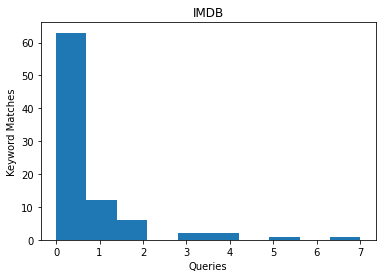

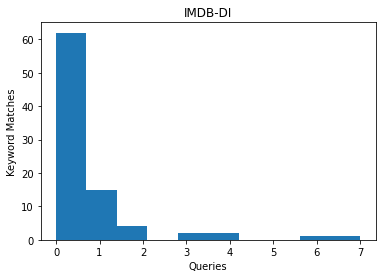

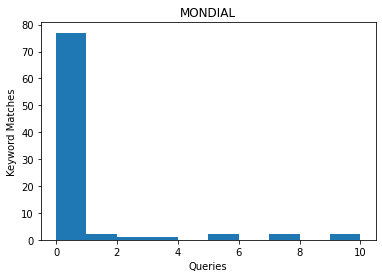

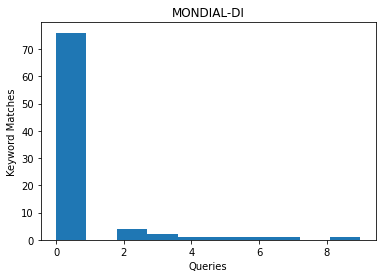

In [7]:
for label in label_order:
    
    hist_data2 = [0]*(1+max(num_keyword_matches['IMDB']))
    for x in num_keyword_matches[label]:
        hist_data2[x]+=1

    plt.hist(hist_data2)
    plt.xlabel('Queries')
    plt.ylabel('Keyword Matches')
    plt.title(label)
    plt.show()

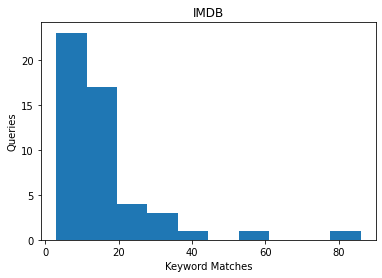

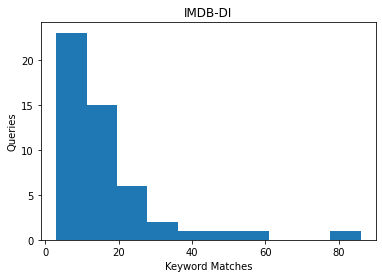

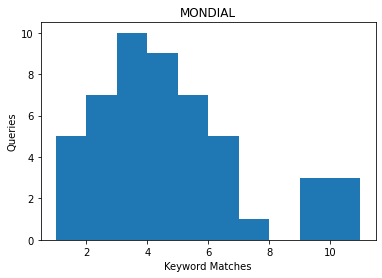

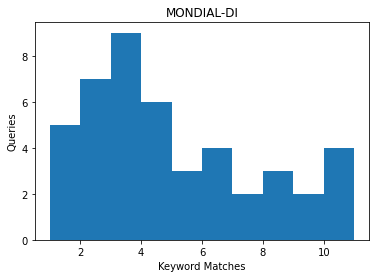

In [8]:
for label in label_order:
    hist_data=num_keyword_matches[label]
    plt.hist(hist_data,orientation="vertical")
    
    plt.xlabel('Keyword Matches')
    plt.ylabel('Queries')
    plt.title(label)
    
    plt.show()

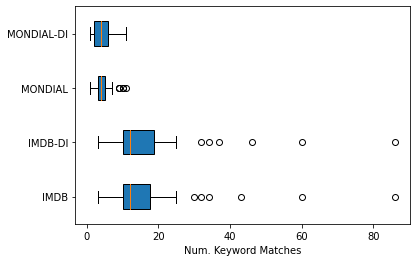

In [9]:
box_plot_data=[num_keyword_matches[label] for label in label_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=label_order)

plt.xlabel('Num. Keyword Matches')
plt.show()

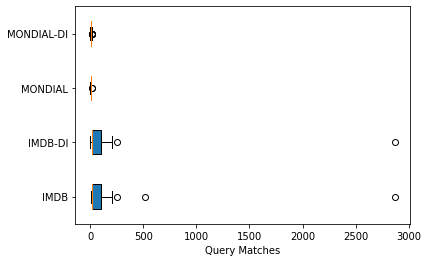

In [10]:
box_plot_data=[num_query_matches[label] for label in label_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=label_order)

plt.xlabel('Query Matches')

plt.show()

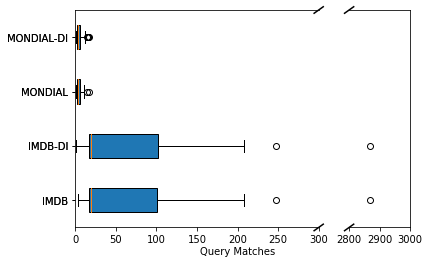

In [11]:
width_ratios = [4, 1]

fig,(ax, ax2)  = plt.subplots(nrows = 1, ncols = 2, sharey=True,gridspec_kw={'width_ratios': width_ratios})

# plot the same data on both axes
ax.boxplot(box_plot_data,vert=0,patch_artist=True,labels=label_order)
ax2.boxplot(box_plot_data,vert=0,patch_artist=True,labels=label_order)

ax.set_xlim(xmin=0, xmax=300)  # outliers only
ax2.set_xlim(xmin=2800, xmax=3000) # most of the data

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.tick_params(axis='y',labelleft=False,length=0)  # don't put tick labels at the top


dx = .015*(sum(width_ratios)/width_ratios[0])  # how big to make the diagonal lines in axes coordinates
dy = .015 

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1 - dx, 1 + dx), (1 - dy, 1 + dy), **kwargs)  # top-left diagonal
ax.plot((1 - dx, 1 + dx), (0 - dy, 0 + dy), **kwargs)  # top-right diagonal


dx = .015*(sum(width_ratios)/width_ratios[1])  # how big to make the diagonal lines in axes coordinates
dy = .015

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((0 - dx, 0 + dx), (1 - dy, 1 + dy), **kwargs)  # bottom-left diagonal
ax2.plot((0 - dx, 0 + dx), (0 - dy, 0 + dy), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'


fig.text(0.5, 0.03, 'Query Matches', ha='center')

plt.show()

In [12]:
Bergamaschi = {'P@1': 0.8571428571428571}

In [51]:
performance_imdb = {'km': [1.1334218930001043, 0.06235605400001987, 0.1833795300001384, 0.17496254700017744, 0.24737423900000977, 0.13644621299999926, 0.13733035499990365, 0.08133509999993294, 0.06265374100007648, 0.16799658499985526, 0.3758834359998673, 0.2283726509999724, 0.04266462500004309, 0.18688335399997413, 0.2847157109999898, 0.13126290800005336, 0.049000968999962424, 0.06331423799997538, 0.10500306900007672, 0.05073486599985699, 0.19697267800006557, 0.2222650659998635, 0.375134117000016, 0.1741825679998783, 0.11798569199982012, 0.20456003799995415, 0.21705255200004103, 0.1496921469999961, 0.4323127979998844, 0.1869769400000223, 0.5729913540001235, 0.6957941289999781, 0.49095785300005446, 0.3120115510000687, 0.3025325309999971, 0.06251164600007542, 0.050289047999967806, 0.28115775400010534, 0.25410831900012454, 0.2074787419999211, 0.10597161199984839, 0.17403762000003553, 0.2605964449999192, 0.1467846580001151, 0.11899540199988223, 0.2749300579998817, 0.12240518499993414, 0.10399532099995668, 0.15834324900015417, 0.5521902689999934], 'qm': [0.0010096700000303827, 0.000845103999836283, 0.008664804999853004, 0.0005254629998034943, 0.001448039000024437, 0.001823880000074496, 0.003011283999967418, 0.001027925000016694, 0.00091471099995033, 0.0016669569999976375, 0.0015800510000190116, 0.0008311200001571706, 0.00022119400000519818, 0.0014609080001264374, 0.001504395999972985, 0.0011197989999800484, 0.00017406799997843336, 0.0011556320000636333, 0.0012068099999851256, 0.00020018000009258685, 0.2376980660001209, 0.3336346250000588, 0.36860401799981446, 0.325005653000062, 0.06769944000006944, 0.3839504830000351, 0.32709071499994025, 0.18693190099997992, 0.5886314900001253, 0.10491228600017166, 0.6218557919999057, 1.1145787230000224, 0.040591913000071145, 0.2727791489999163, 0.29681426100000863, 0.0004951729999902454, 0.0013527080000130809, 0.38948951199995463, 0.20696113899998636, 0.004582290000143985, 0.008044443000017054, 0.30888125299998137, 0.6479846839999936, 0.0010010009998495661, 0.12212745000010727, 0.14716932000010274, 0.012827856000058091, 0.0004982870000276307, 0.010048041999880297, 0.07549106600004052], 'cn': [0.09246098999983587, 0.09891137700014951, 0.13616690100002415, 0.00017193900021084119, 0.14248723500008964, 0.13825306100011403, 0.13976667800011455, 0.13285878000010598, 0.14367277100018327, 0.13960785800009035, 0.13992085300014878, 0.06511582299981455, 0.00020376700013002846, 0.14130568299992774, 0.145307277000029, 0.14329399700000067, 0.0001372410001749813, 0.13620057299999644, 0.14744374099996094, 0.00018352200004301267, 0.2760611669998525, 0.08465544499995303, 0.10394374600014089, 0.08546229600005972, 0.14856149499996718, 0.17166487999998026, 0.07753315100012514, 0.18205836600009206, 0.17000374300005205, 0.20820434899997053, 0.05441178900014165, 0.02092984000000797, 7.199299989224528e-05, 0.09084354500009795, 0.10459140000011757, 0.051600764000113486, 0.1599382560000322, 0.38267531199994664, 0.4536997390000579, 0.32352362699998594, 0.2105158780000238, 0.06787525999993704, 0.15273785299996234, 0.1396533450001698, 0.09960022499990373, 0.20129431600003045, 0.15254474899984416, 0.07563957399997889, 0.473239182000043, 0.42153784899983293], 'total': [1.2268925529999706, 0.16211253500000566, 0.32821123600001556, 0.17565994900019177, 0.39130951300012384, 0.2765231540001878, 0.2801083169999856, 0.2152218050000556, 0.20724122300021008, 0.30927139999994324, 0.5173843400000351, 0.2943195939999441, 0.043089586000178315, 0.3296499450000283, 0.4315273839999918, 0.2756767040000341, 0.04931227800011584, 0.20067044300003545, 0.2536536200000228, 0.05111856799999259, 0.710731911000039, 0.6405551359998753, 0.8476818809999713, 0.584650517, 0.33424662699985674, 0.7601754009999695, 0.6216764180001064, 0.5186824140000681, 1.1909480310000617, 0.5000935750001645, 1.2492589350001708, 1.8313026920000084, 0.5316217590000178, 0.675634245000083, 0.7039381920001233, 0.11460758300017915, 0.21158001200001308, 1.0533225780000066, 0.9147691970001688, 0.535584659000051, 0.32453193299988925, 0.550794132999954, 1.0613189819998752, 0.28743900400013445, 0.34072307699989324, 0.6233936940000149, 0.2877777899998364, 0.1801331819999632, 0.6416304730000775, 1.0492191839998668]}
performance_imdb_memory = {'km': [1.0858513389998734, 0.0012964299999111972, 0.11763894299974709, 0.14484526800015374, 0.18508356600023035, 0.0760300830002052, 0.07577661200002694, 0.020514202999947884, 0.0012839840001106495, 0.10603115300000354, 0.31406956900036676, 0.168342969999685, 0.01158866100013256, 0.12748083400038013, 0.22517251299996133, 0.07156880299999102, 0.018497811000088404, 0.001350639000065712, 0.04458188799981144, 0.020579884999733622, 0.10635089800007336, 0.16071711399990818, 0.31232982699975764, 0.11278493999998318, 0.08779920899996796, 0.11269113300022582, 0.15350240199995824, 0.08951856000021507, 0.3313140270001895, 0.1282169050000448, 0.4539722869999423, 0.5703565070002696, 0.27552173300000504, 0.20982478099995205, 0.23727427900030307, 0.0012826669999412843, 0.018924832999800856, 0.16998896500035698, 0.16250612800013187, 0.11385018999999375, 0.012525418000222999, 0.07948945399994045, 0.19662327400010327, 0.08618718500019895, 0.08810533399991982, 0.21024243100009699, 0.030945956999858026, 0.04339953999988211, 0.09748257699993701, 0.4345631319997665], 'qm': [0.0009211229998982162, 0.0008310339999297867, 0.009015859000101045, 0.0004992560002392565, 0.0014488980000351148, 0.001782757999990281, 0.002872138999919116, 0.0009822609999901033, 0.0008839809997880366, 0.0016437310000583238, 0.0015241460000652296, 0.0007762019999972836, 0.00018214900001112255, 0.0014250939998419199, 0.0014126450000730983, 0.0010789630000545003, 0.00015373399992313352, 0.0010828590002347482, 0.0011522660001901386, 0.0001816140002119937, 0.24432950500022343, 0.3349706940002761, 0.3641517430000931, 0.3305987130001995, 0.06822553899974082, 0.38159058199971696, 0.3318663350000861, 0.18826310399981594, 0.6100867699997252, 0.10360369699992589, 0.6318612909999501, 1.1332933649996448, 0.04307932700021411, 0.26604569300025105, 0.2996466619997591, 0.0004680840002038167, 0.0012980830001652066, 0.40149586100005763, 0.21701324299965563, 0.004780000000209839, 0.007648806999895896, 0.3119940950000455, 0.6542665040001339, 0.001008813999760605, 0.12311942199994519, 0.14922386099988216, 0.012551651000194397, 0.0004716030002782645, 0.010139431999959925, 0.07795501600003263], 'cn': [0.08958834400027627, 0.10222344400017391, 0.1474398929999552, 0.000176478999946994, 0.14023531399971034, 0.14305377599976055, 0.15149657600022692, 0.13323264500013465, 0.14410992500006614, 0.1460055510001439, 0.14472615699969538, 0.06843779100017855, 0.0001757309996719414, 0.14001989600001252, 0.1440204829996219, 0.14580828499993004, 0.00012794399981430615, 0.14924391199974707, 0.14865123699973992, 0.00017197199986185296, 0.2966381989999718, 0.12003509499982101, 0.11580002500022601, 0.10627879899993786, 0.14298194499997408, 0.1679986160002045, 0.1457187989999511, 0.2723431370000071, 0.13778358300032778, 0.24918975299988233, 0.13554390700028307, 0.023958650000167836, 7.270800006153877e-05, 0.14662838899994313, 0.17195622200006255, 0.043220602000019426, 0.1630582869997852, 0.2662699419997807, 0.3921535490003407, 0.4191238009998415, 0.16169064299992897, 0.0638953800003037, 0.19054849199983437, 0.14746319799996854, 0.12026427799992234, 0.21709831399994073, 0.14013016699982472, 0.07672675599997092, 0.3906144719999247, 0.3530986569999186], 'total': [1.1763608060000479, 0.1043509080000149, 0.2740946949998033, 0.14552100300034, 0.3267677779999758, 0.22086661699995602, 0.23014532700017298, 0.15472910900007264, 0.14627788999996483, 0.25368043500020576, 0.46031987200012736, 0.23755696299986084, 0.011946540999815625, 0.26892582400023457, 0.3706056409996563, 0.21845605099997556, 0.018779488999825844, 0.15167741000004753, 0.1943853909997415, 0.02093347099980747, 0.6473186020002686, 0.6157229030000053, 0.7922815950000768, 0.5496624520001205, 0.29900669299968285, 0.6622803310001473, 0.6310875359999955, 0.5501248010000381, 1.0791843800002425, 0.481010354999853, 1.2213774850001755, 1.7276085220000823, 0.3186737680002807, 0.6224988630001462, 0.7088771630001247, 0.04497135300016453, 0.18328120299975126, 0.8377547680001953, 0.7716729200001282, 0.5377539910000451, 0.18186486800004786, 0.45537892900028965, 1.0414382700000715, 0.2346591969999281, 0.33148903399978735, 0.5765646059999199, 0.18362777499987715, 0.12059789900013129, 0.49823648099982165, 0.8656168049997177]}
performance_imdb_counter = {'km': [1.4422833529999934, 0.06229976199995235, 0.18746427700000368, 0.17668701499997042, 0.2697852059999377, 0.14073043300004429, 0.18597274700005073, 0.08209898699999485, 0.062168155999984265, 0.16696628599993346, 0.4344217899999876, 0.2277669469999637, 0.04218240699992748, 0.20688672500000393, 0.3080500099999881, 0.1339860770000314, 0.050792320999903495, 0.06339885599993522, 0.10749252499999784, 0.05285636799999338, 0.20144449800000075, 0.228558297999939, 0.46526799599996593, 0.17392421800002467, 0.1181083999999828, 0.20400445299992498, 0.22532450600010634, 0.14902604699989297, 0.4417880470000455, 0.18831147799994596, 0.5925662849999753, 0.7136004740000317, 0.489570859999958, 0.3019449070000064, 0.3087397819999751, 0.06213612599992757, 0.05025797100006457, 0.28908492799996566, 0.2523854260000462, 0.2050475359999382, 0.10387606799997684, 0.1724819479999269, 0.28794717999994646, 0.1478175330000795, 0.1190829050000275, 0.27632077599992044, 0.12226141600001483, 0.10526185100002294, 0.1602767669999139, 0.5560912089999874], 'qm': [0.001250095999921541, 0.000998246999984076, 0.00908791899996686, 0.0005582300000241958, 0.0016567559999884907, 0.0021443319999434607, 0.003153591000000233, 0.0011404080000829708, 0.0010556649999671208, 0.0018289299999878494, 0.002326949999996941, 0.0009020510000254944, 0.00022464800008492603, 0.0018100610000146844, 0.001569118000020353, 0.0012890130000187128, 0.00019498000006024085, 0.001351255000031415, 0.0014832750000550732, 0.000225559999989855, 0.24638552900000832, 0.3438728419999961, 0.3671816429999808, 0.3277538250000589, 0.06774618899999041, 0.38320855400002074, 0.32654103799995937, 0.1907841740001004, 0.6057386499999211, 0.10369405400001597, 0.618680669000014, 1.1101713929999732, 0.0641484269999637, 0.26458563400001367, 0.2989443179999398, 0.0005582950000189157, 0.001431062999927235, 0.3805299499999819, 0.20941262199994526, 0.0058214630000748, 0.009358464000001732, 0.3089068850000558, 0.6499231909999708, 0.0012136819999568615, 0.12284984999996595, 0.15491195499998867, 0.014668750999931035, 0.0006092910000461416, 0.011255169000037313, 0.09565515600002072], 'cn': [0.0910633980000739, 0.10073342800001228, 0.1369455349999953, 0.00019048599995130644, 0.1458492460000116, 0.1481852419999541, 0.14334924299998875, 0.13009541499991428, 0.13163135199999942, 0.144868261000056, 0.14484127499997612, 0.060182613999927526, 0.00016953499994087906, 0.1455466909999359, 0.1448068450000619, 0.1449054919999071, 0.00012557899992771127, 0.1425419879999481, 0.14855505499997435, 0.00016643300000396266, 0.2138612840000178, 0.03387566499998229, 0.15647489600007702, 0.11479946699989796, 0.14660354700004063, 0.2060079359999918, 0.10124811399998634, 0.3966127869999809, 0.2962053680000736, 0.19668047799996202, 0.048251922000076775, 0.01897195100002591, 6.706400006351032e-05, 0.14120094500003688, 0.09467388800010212, 0.04314907200000562, 0.16032106900001963, 0.2873447079999778, 0.23645746700003656, 0.3583522839999205, 0.20894645100008802, 0.07117230799997287, 0.0971457120000423, 0.14970437500005573, 0.11820383199994922, 0.21519011899999896, 0.17685643200002232, 0.07306340799993905, 0.4654726190000247, 0.492734745000007], 'total': [1.5345968469999889, 0.1640314369999487, 0.3334977309999658, 0.17743573099994592, 0.4172912079999378, 0.29106000699994183, 0.3324755810000397, 0.2133348099999921, 0.1948551729999508, 0.3136634769999773, 0.5815900149999607, 0.2888516119999167, 0.042576589999953285, 0.3542434769999545, 0.45442597300007037, 0.2801805819999572, 0.05111287999989145, 0.20729209899991474, 0.25753085500002726, 0.0532483609999872, 0.6616913110000269, 0.6063068049999174, 0.9889245350000238, 0.6164775099999815, 0.33245813600001384, 0.7932209429999375, 0.653113658000052, 0.7364230079999743, 1.3437320650000402, 0.48868600999992395, 1.259498876000066, 1.8427438180000308, 0.5537863509999852, 0.707731486000057, 0.702357988000017, 0.1058434929999521, 0.21201010300001144, 0.9569595859999254, 0.698255515000028, 0.5692212829999335, 0.3221809830000666, 0.5525611409999556, 1.0350160829999595, 0.2987355900000921, 0.36013658699994266, 0.6464228499999081, 0.3137865989999682, 0.17893455000000813, 0.6370045549999759, 1.1444811100000152]}
performance_imdb_combine = {'km': [1.1471639559999858, 0.06256322799981717, 0.18592991700006678, 0.1777958640000179, 0.24831013800007895, 0.13798400899986518, 0.13887241299994457, 0.08211153899992496, 0.06276631799983079, 0.16853219199992964, 0.30116066599998703, 0.22821354000006977, 0.04239804400003777, 0.1900320180000108, 0.28666438699997343, 0.13250714999981028, 0.04933331699999144, 0.0627883600000132, 0.10680427799979952, 0.05133885899999768, 0.1996690099999796, 0.2231467489998522, 0.3774943120001808, 0.17577493500016317, 0.11881943399998818, 0.20621809599992957, 0.21666449300005297, 0.15084439899987956, 0.42585221300009835, 0.1882453880000412, 0.5804020580001179, 0.7001987450000797, 0.49056354499998633, 0.30370646100004706, 0.3029870430000301, 0.06306408400018881, 0.050646328999846446, 0.29782275499997013, 0.25597459100004016, 0.20831808099978844, 0.10506417400006285, 0.17375466600014988, 0.26247052700000495, 0.14767275100007282, 0.12056474800010619, 0.2814423899999383, 0.12369559700005084, 0.10462282000003142, 0.16069812000000638, 0.5598638799999662], 'qm': [0.0008520690000750619, 0.0006827930001236382, 0.008552548999887222, 0.0005767619998096052, 0.001310654999997496, 0.0016098860000965942, 0.002724361999980829, 0.0009375909999107535, 0.0008390919999783364, 0.001481351000165887, 0.0013713800001369236, 0.0006996119998348149, 0.00019389699991734233, 0.0012744410000777862, 0.0012597009999808506, 0.0008807110000361718, 0.00016733300003579643, 0.000940735999847675, 0.0010178670002005674, 0.0001947910000126285, 0.24104018100001667, 0.3320209099999829, 0.3616825419999259, 0.3278752629998962, 0.0692476029998943, 0.38051895400008107, 0.32911401799992746, 0.19045052799992845, 0.589502838000044, 0.10373148600001514, 0.6073042149998855, 1.0918913989999055, 0.004536084000164919, 0.2646496909999314, 0.2993289480000385, 0.00044858799992653076, 0.0012328830000569724, 0.38019642399990516, 0.20890824499997507, 0.0029272650001530565, 0.005313010999998369, 0.3110341619999417, 0.6405849129998842, 0.0008709679998446518, 0.12435069200000726, 0.13301404000003458, 0.008713121000027968, 0.0005052910000813426, 0.008869647999972585, 0.05131595800003197], 'cn': [0.08794801599992752, 0.10175608800000191, 0.14065420099996118, 0.0001821260000269831, 0.14888703799988434, 0.142461701000002, 0.14159879699991507, 0.13300822900009734, 0.14022645700015346, 0.14612222100004146, 0.14860561499995129, 0.06324330000006739, 0.0001758829998834699, 0.15320226599988018, 0.14292370699990897, 0.13639207799997166, 0.00013540800000555464, 0.14172710700017888, 0.1398442529998647, 0.00017312099998889607, 0.2459394270001667, 0.11147074100017562, 0.16168169299999136, 0.11359970400008024, 0.1531932800000959, 0.09833092199983184, 0.11379083199994966, 0.3291460850000476, 0.17541269599996667, 0.21557267000002867, 0.05321082400018895, 0.026925191000145787, 5.946399983258743e-05, 0.1862185289999161, 0.12025158199980979, 0.05123618399989027, 0.1553304480000861, 0.26552950199993575, 0.34995448600011514, 0.41916828900002656, 0.2187627880000491, 0.08096522599998934, 0.11466580499995871, 0.15062242800013337, 0.07208654199985176, 0.15753419399993618, 0.1428170289998434, 0.0781344749998425, 0.4837468619998617, 0.4472001219999129], 'total': [1.2359640409999884, 0.16500210899994272, 0.3351366669999152, 0.1785547519998545, 0.3985078309999608, 0.28205559599996377, 0.28319557199984047, 0.21605735899993306, 0.20383186699996259, 0.316135764000137, 0.45113766100007524, 0.292156451999972, 0.04276782399983858, 0.34450872499996876, 0.43084779499986325, 0.2697799389998181, 0.04963605800003279, 0.20545620300003975, 0.24766639799986478, 0.05170677099999921, 0.686648618000163, 0.6666384000000107, 0.900858547000098, 0.6172499020001396, 0.3412603169999784, 0.6850679719998425, 0.6595693429999301, 0.6704410119998556, 1.190767747000109, 0.507549544000085, 1.2409170970001924, 1.819015335000131, 0.49515909299998384, 0.7545746809998946, 0.7225675729998784, 0.11474885600000562, 0.20720965999998953, 0.943548680999811, 0.8148373220001304, 0.630413634999968, 0.32913997300011033, 0.5657540540000809, 1.0177212449998478, 0.29916614700005084, 0.3170019819999652, 0.5719906239999091, 0.2752257469999222, 0.18326258599995526, 0.6533146299998407, 1.058379959999911]}
performance_imdb_combine_counter = {'km': [1.13587105900001, 0.06275140399998236, 0.18630842199991093, 0.17896147400006157, 0.24808494700005213, 0.1385986509999384, 0.14000133099989398, 0.0823793189999833, 0.06267537799999445, 0.1690874729999905, 0.3045294250000552, 0.22903697999981887, 0.042298853000147574, 0.1916676970001845, 0.2874660079999103, 0.13189631800014467, 0.04948479099994074, 0.06281533500009573, 0.10708887000009781, 0.051543355999911, 0.20028549199992085, 0.22514815200020166, 0.38245851199985736, 0.17589921900002992, 0.12048011899992161, 0.2076520079999682, 0.21806485399997655, 0.15239171300004273, 0.42925539900011245, 0.19244663499989656, 0.5838334430000032, 0.7073572599999807, 0.4964769640000668, 0.3099169100000836, 0.3035145740000189, 0.0643457070000295, 0.052203739000106, 0.28560038199998417, 0.25922509099996205, 0.20941440800015698, 0.10709444100007204, 0.17580556500001876, 0.26515897800004495, 0.14843315500002063, 0.12155507100010254, 0.28269972799989773, 0.12620941099999072, 0.10601033900002221, 0.16315141799987032, 0.5623104599999351], 'qm': [0.000977090999867869, 0.0007196709998424922, 0.007392853000055766, 0.0005474079998748493, 0.0012607539999862638, 0.0016666300000451884, 0.0028662540000823356, 0.0009454759999698581, 0.0008138020000387769, 0.0014397830000234535, 0.0020371269999941433, 0.0007426409999879979, 0.00021912399984103104, 0.001370645999941189, 0.0013013190000492614, 0.0009197350000249571, 0.00019105999990642886, 0.0009773909998784802, 0.0010698450000745652, 0.00021539200020015414, 0.24294173700013744, 0.3330161499998212, 0.36787804499999766, 0.3299213239999972, 0.06903088600006413, 0.3853691259998868, 0.3327718420000565, 0.1913646789998893, 0.5957763059998342, 0.10446172000001752, 0.6146645169999374, 1.0978678589999618, 0.012302385999873877, 0.26834291599993776, 0.2998048189999736, 0.0005451229999380303, 0.001330014999894047, 0.3846739040000102, 0.20975461300008647, 0.0029600749999190157, 0.00532963299997391, 0.3121266559999185, 0.6417942819998643, 0.001047108999955526, 0.125414974000023, 0.1340889610000886, 0.008884914999953253, 0.000506894999944052, 0.009120336000023599, 0.053645523000113826], 'cn': [0.09104152700001578, 0.10981004100017344, 0.14985848600008467, 0.00018309699999008444, 0.14917427299997144, 0.1415364199999658, 0.14089792400000078, 0.13771357300015552, 0.14604779299997972, 0.15119233799987342, 0.14622594499996922, 0.06426855300014722, 0.00016990300014185777, 0.14247079400001894, 0.1410771939999904, 0.1496230839998134, 0.00012692400014202576, 0.14896095300014167, 0.1422283099998367, 0.00016781299996182497, 0.2946320389999073, 0.12446501900012663, 0.15196574200012947, 0.1005713150000247, 0.14996046600003865, 0.15700606300015352, 0.10904064999999719, 0.18784127200001421, 0.254330740000114, 0.1815217630000916, 0.149213434000103, 0.022132671000008486, 6.315500013442943e-05, 0.1992514519999986, 0.12159988500002328, 0.0504206969999359, 0.15919039400000656, 0.2301520819999041, 0.3358140909999747, 0.39048287099990375, 0.21873127300000306, 0.07524787200009087, 0.15389469000001554, 0.14657455700012179, 0.1186067839998941, 0.24507506100007959, 0.16150880800000778, 0.07683329099995717, 0.4747030440000799, 0.42490155799987406], 'total': [1.2278896769998937, 0.1732811159999983, 0.34355976100005137, 0.1796919789999265, 0.3985199740000098, 0.2818017009999494, 0.2837655089999771, 0.22103836800010868, 0.20953697300001295, 0.32171959399988737, 0.45279249700001856, 0.2940481739999541, 0.04268788000013046, 0.3355091370001446, 0.42984452099994996, 0.282439136999983, 0.0498027749999892, 0.21275367900011588, 0.2503870250000091, 0.05192656100007298, 0.7378592679999656, 0.6826293210001495, 0.9023022989999845, 0.6063918580000518, 0.3394714710000244, 0.7500271970000085, 0.6598773460000302, 0.5315976639999462, 1.2793624450000607, 0.4784301180000057, 1.3477113940000436, 1.827357789999951, 0.5088425050000751, 0.77751127800002, 0.7249192780000158, 0.11531152699990344, 0.2127241480000066, 0.9004263679998985, 0.8047937950000232, 0.6028573539999798, 0.331155347000049, 0.5631800930000281, 1.0608479499999248, 0.29605482100009795, 0.36557682900001964, 0.6618637500000659, 0.29660313399995175, 0.18335052499992344, 0.6469747979999738, 1.040857540999923]}
performance_mondial = {'km': [1.653195943000128, 0.1313252630000079, 0.3433164759999272, 0.9119391650001489, 0.13265058599995427, 0.28393547099994976, 0.010210167999957775, 0.010119960999873001, 0.343075995999925, 0.4775179549999393, 0.33905363900021257, 0.2229557929999828, 0.6230724570000348, 0.010456307999902492, 0.22222744300006525, 0.8080818079999972, 1.7606304229998386, 0.3586207989999366, 0.534935201000053, 0.426935222000111, 0.6492854329999318, 0.23822078500006683, 0.42166789499992774, 0.6651732840000477, 0.6902501259999099, 0.25507861799997045, 0.5166498640001009, 0.45839670500004104, 0.22662788399998135, 0.4107609559998764, 1.0832148039999083, 0.6127225190000445, 1.7205007570000816, 1.4222216850000677, 0.3856202850001864, 0.34891692199994395, 0.49782576500001596, 0.34881273799987866, 0.2572664490000989, 0.3487733389999903, 0.24167428900000232, 0.4213426300000265, 0.5571300760000213, 0.23824628800002756, 0.34058149899988166], 'qm': [0.00014455999985329981, 8.600099999966915e-05, 0.000172329999941212, 0.19586378500002866, 0.00012606299992512504, 9.042000010595075e-05, 7.424900013575098e-05, 7.294500005627924e-05, 0.004848456999980044, 0.0048766889999569685, 0.00014892599983795662, 0.00014562799992745568, 0.004978975000085484, 8.362200014744303e-05, 0.00012563499990392302, 0.0011741910000182543, 0.00016130300014083332, 0.00016492300005666038, 0.0010063540000828652, 0.00023100799990061205, 0.004718488000207799, 0.0005581499999607331, 0.0003688379999857716, 0.026872460000049614, 0.0039275159999760945, 0.00011804499990830664, 0.00042701500001385284, 0.0028685320000931824, 0.043436631000076886, 0.0002759920000698912, 0.03735421300007147, 0.0006932769999821176, 0.07338139900002716, 0.03692418899981931, 0.0003609210000377061, 0.0004572280001866602, 0.00030329300011544547, 0.0004637700001239864, 0.00045090499997968436, 0.00026244099990435643, 0.00027698000008058443, 0.0001730510000470531, 0.00026690599997891695, 0.00011329299991302832, 0.00011312600008750451], 'cn': [0.00015194499997051025, 5.654500000673579e-05, 0.00018545500006439397, 11.052845273999992, 0.00010188999999627413, 7.226299999274488e-05, 4.613199985215033e-05, 4.1518999978507054e-05, 0.004008224000017435, 0.003027846000122736, 5.75340000068536e-05, 0.00013589500008492905, 6.347347319999926, 4.970400004822295e-05, 0.00010321000013391313, 0.863426163999975, 0.0024572380000336125, 0.002706618000047456, 0.2197656209998513, 0.23631047899993973, 0.003401310999834095, 0.0014715530001012667, 0.05680630200004089, 0.7844891180000104, 0.0017554420001033577, 0.0015173920000961516, 0.07467656699986946, 0.011206061999928352, 0.0013922200000706653, 0.03493361699997877, 2.6964029880000453, 4.026350076999961, 7.660848818999966, 3.47812194800008, 0.028679717999921195, 8.14358088799986, 0.027440065999826402, 5.458408983999789, 8.033578318999844, 0.027164619000132006, 0.099142780999955, 0.020052324999824123, 0.132657897999934, 1.652945868000188, 1.6483894890000101], 'total': [1.6534924479999518, 0.1314678090000143, 0.3436742609999328, 12.16064822400017, 0.13287853899987567, 0.28409815400004845, 0.010330548999945677, 0.010234424999907787, 0.3519326769999225, 0.485422490000019, 0.3392600990000574, 0.2232373159999952, 6.975398752000046, 0.010589634000098158, 0.2224562880001031, 1.6726821629999904, 1.763248964000013, 0.3614923400000407, 0.7557071759999872, 0.6634767089999514, 0.6574052319999737, 0.24025048800012883, 0.4788430349999544, 1.4765348620001078, 0.6959330839999893, 0.2567140549999749, 0.5917534459999843, 0.4724712990000626, 0.2714567350001289, 0.44597056499992505, 3.816972005000025, 4.6397658729999876, 9.454730975000075, 4.937267821999967, 0.4146609240001453, 8.492955037999991, 0.5255691239999578, 5.807685491999791, 8.291295672999922, 0.37620039900002666, 0.3410940500000379, 0.44156800599989765, 0.6900548799999342, 1.8913054490001286, 1.9890841139999793]}
performance_mondial_memory = {'km': [1.39806002899968, 0.13857558200015774, 0.3511102299999038, 0.9502926969998953, 0.14155614699984653, 0.2944004030000542, 0.009660590999828855, 0.009544979000111198, 0.3465588209996895, 0.4881186279999383, 0.36497787700000117, 0.23023496699988755, 0.6374999660001777, 0.010282241999902908, 0.231268504000127, 0.8309570440001153, 1.8016337630001544, 0.3701328779998221, 0.5418700889999855, 0.4403853810003966, 0.6672947600000043, 0.2527137369997945, 0.41854998899998463, 0.7028919589997713, 0.7073917869997786, 0.267468092999934, 0.5388545320001867, 0.47412456999973074, 0.23455092599988348, 0.4217400219999945, 1.089808331000313, 0.6047693499999696, 1.7487117359996773, 1.4806572709999273, 0.394226666999657, 0.3628360369998518, 0.5225011259999519, 0.35081053799967776, 0.2712334769998961, 0.3474311510003645, 0.25742781099961576, 0.4365252790003069, 0.5542825949996768, 0.23955205800029944, 0.3429388800000197], 'qm': [0.00014152600033412455, 8.309099985126522e-05, 0.00016847899996719207, 0.1947369270001218, 0.00011827499974970124, 8.273299999927985e-05, 7.178200030466542e-05, 6.896300010339473e-05, 0.004933488999995461, 0.004943096999795671, 0.00019804499970632605, 0.0001465440000174567, 0.004993645000013203, 8.677599998918595e-05, 0.00011689299981298973, 0.0012160269998275908, 0.000157328000113921, 0.00016031699988161563, 0.0010012320003625064, 0.00021996099985699402, 0.004840902000069036, 0.000540091999937431, 0.0003608639999583829, 0.02784353800007011, 0.003916464000212727, 0.0001211179996971623, 0.0004017169999315229, 0.0028967450002710393, 0.04401908999989246, 0.00028986600000280305, 0.03694172299992715, 0.0007120270001905737, 0.07424611500027822, 0.03713064899966412, 0.00034661500012589386, 0.0004467519997888303, 0.00029601400001411093, 0.0004864550001002499, 0.0004810870000255818, 0.00025579499970262987, 0.00028620200009754626, 0.0001684169997133722, 0.00026259800006300793, 0.00011139299977003247, 0.00011617500013016979], 'cn': [0.00015748099986012676, 5.7884999932866776e-05, 0.0001874390000011772, 4.441164431999823, 0.00010137200024473714, 5.774000010205782e-05, 4.477199991015368e-05, 3.798499983531656e-05, 0.0041750660002435325, 0.003436379000049783, 8.66250002218294e-05, 0.0001332789997832151, 13.48494476399992, 6.160000020827283e-05, 0.00010001000009651762, 0.28277647300001263, 0.0027786349996858917, 0.002739278000262857, 0.19791203499971743, 0.23598351500004355, 0.002145605999885447, 0.0025538439999763796, 0.02856987199993455, 0.7923356950000198, 0.0017966949999390636, 0.0018686329999582085, 0.05448995899996589, 0.011269326999808982, 0.03303599600030793, 0.039403629999924306, 3.865330780000022, 0.03137989400011065, 6.794920776999788, 4.242331169000408, 0.02730569799996374, 4.012012630000299, 0.026622148000114976, 4.728694729999916, 4.059611729000153, 0.027336489999925107, 0.023782187000051636, 0.06648498899994593, 0.04330504000017754, 1.5666055900001084, 1.648139583000102], 'total': [1.3983590359998743, 0.13871655799994187, 0.3514661479998722, 5.58619405599984, 0.14177579399984097, 0.29454087600015555, 0.009777145000043674, 0.009651927000049909, 0.3556673759999285, 0.4964981039997838, 0.3652625469999293, 0.23051478999968822, 14.12743837500011, 0.010430618000100367, 0.2314854070000365, 1.1149495439999555, 1.8045697259999542, 0.37303247299996656, 0.7407833560000654, 0.6765888570002971, 0.6742812679999588, 0.2558076729997083, 0.44748072499987757, 1.5230711919998612, 0.7131049459999304, 0.2694578439995894, 0.5937462080000842, 0.48829064199981076, 0.31160601200008387, 0.4614335179999216, 4.992080834000262, 0.6368612710002708, 8.617878627999744, 5.760119089, 0.42187897999974666, 4.37529541899994, 0.549419288000081, 5.079991722999694, 4.331326293000075, 0.3750234359999922, 0.28149619999976494, 0.5031786849999662, 0.5978502329999174, 1.8062690410001778, 1.9911946380002519]}

start_slice = None
end_slice = None

key_order = ['total', 'cn', 'qm', 'km'][start_slice:end_slice]
labels=['Total', 'Candidate Network', 'Query Match', 'Keyword Match'][start_slice:end_slice]

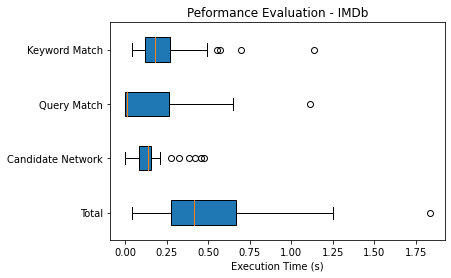

In [32]:
box_plot_data=[performance_imdb[label] for label in key_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=labels)
plt.xlabel('Execution Time (s)')
plt.title('Peformance Evaluation - IMDb')
plt.show()

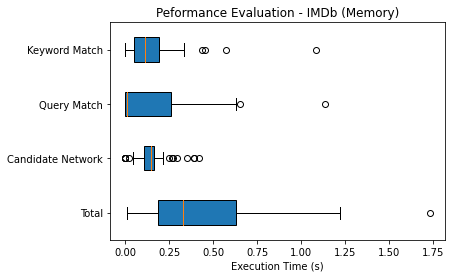

In [53]:
box_plot_data=[performance_imdb_memory[label] for label in key_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=labels)
plt.xlabel('Execution Time (s)')
plt.title('Peformance Evaluation - IMDb (Memory)')
plt.show()

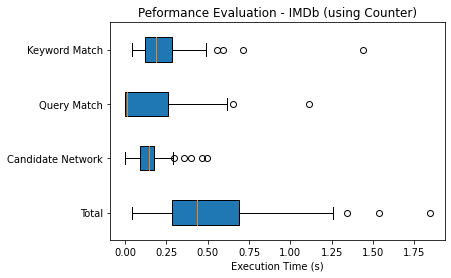

In [33]:
box_plot_data=[performance_imdb_counter[label] for label in key_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=labels)
plt.xlabel('Execution Time (s)')
plt.title('Peformance Evaluation - IMDb (using Counter)')
plt.show()

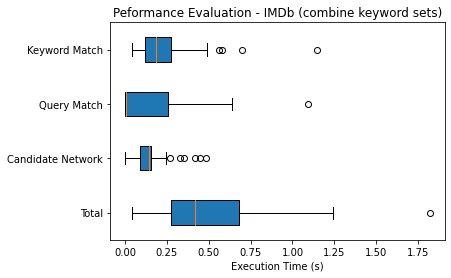

In [34]:
box_plot_data=[performance_imdb_combine[label] for label in key_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=labels)
plt.xlabel('Execution Time (s)')
plt.title('Peformance Evaluation - IMDb (combine keyword sets)')
plt.show()

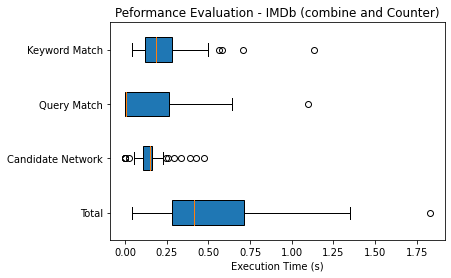

In [49]:
box_plot_data=[performance_imdb_combine_counter[label] for label in key_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=labels)
plt.xlabel('Execution Time (s)')
plt.title('Peformance Evaluation - IMDb (combine and Counter)')
plt.show()

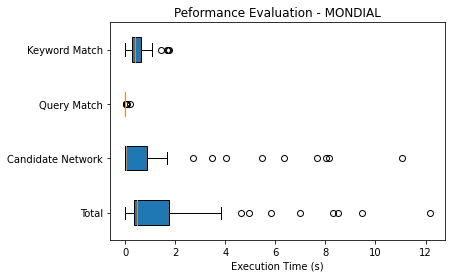

In [43]:
box_plot_data=[performance_mondial[label] for label in key_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=labels)
plt.xlabel('Execution Time (s)')
plt.title('Peformance Evaluation - MONDIAL')
plt.show()

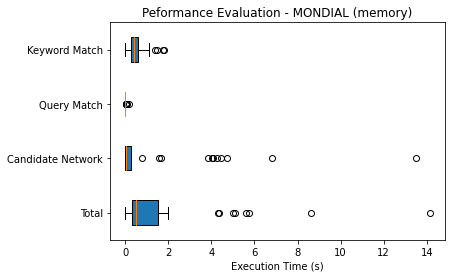

In [48]:
box_plot_data=[performance_mondial_memory[label] for label in key_order]
plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=labels)
plt.xlabel('Execution Time (s)')
plt.title('Peformance Evaluation - MONDIAL (memory)')
plt.show()